In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write


In [119]:
def read_raw_y(file_path):
    if not os.path.isfile(file_path): 
        raise ValueError("Input file is wrong")

    return read(file_path)


def write_wav_file(file_path, fs, y):
    write(file_path, fs, y)
    
    
def get_time_vector(signal):
    signal_len = len(signal)
    return np.linspace(0, signal_len/fs , signal_len, endpoint=False)  
    
    
def get_dft(signal):
    return np.fft.fft(signal)

    
def get_dft_and_frequencies(signal):
    return np.fft.fft(signal), np.fft.fftfreq(len(signal), 1 / fs)
    
def get_signal(dft):
    return np.fft.ifft(dft_result_filtered)
    
def get_windows_dft_and_frequencies(signal, fs, window_size, window_step):
    signal_length = len(signal)
    num_windows = (signal_length - window_size) // window_step + 1
    
    dfts = []
    frequency = np.fft.fftfreq(window_size, 1 / fs)
    
    for i in range(num_windows):
        start_idx = i * window_step
        end_idx = start_idx + window_size
        
        window = signal[start_idx:end_idx]
        dft_result = get_dft(window)
        dfts.append(dft_result)
            
    return dfts, frequency

def get_frequencies_that_exists_in_all_windows(windows_dfts, frequency, min_amplitude):
    all_arrays = np.array(windows_dfts)
    condition_array = np.greater(np.abs(all_arrays), min_amplitude)    
    result_array = np.all(condition_array, axis=0).astype(int)
    return frequency[np.argwhere(result_array > 0)]

def get_frequency_range_to_filter(frequencies_to_filter, extra_filter):
    positive_frequencies = frequencies_to_filter[frequencies_to_filter > 0] 
    return np.max(np.min(positive_frequencies) - extra_filter, 0) , np.max(positive_frequencies) + extra_filter

def get_filtered_signal_dft(signal_dft, frequency, frequency_range_to_filter):
    signal_dft[np.logical_and(frequency_range_to_filter[0] < np.abs(frequency), np.abs(frequency) < frequency_range_to_filter[1])] = 0
    return signal_dft
    

def q1(audio_path) -> np.array:
    """
    1
    :param audio_path: path to q1 audio file
    :return: return q1 denoised version
    """ 
    (fs, signal) = read_raw_y(audio_path)
    signal_dft, frequency = get_dft_and_frequencies(signal)
    windows_dfts, windows_frequency = get_windows_dft_and_frequencies(signal, fs, window_size=300, window_step=100)
    frequencies_to_filter = get_frequencies_that_exists_in_all_windows(windows_dfts, windows_frequency, 1)
    frequency_range_to_filter = get_frequency_range_to_filter(frequencies_to_filter, 10)
    filtered_signal_dft = get_filtered_signal_dft(signal_dft, frequency, frequency_range_to_filter)
    filtered_signal = get_signal(filtered_signal_dft)
    return np.real(filtered_signal)
    
    

In [120]:
(fs, signal) = read_raw_y('./assets/q1.wav')
signal_dft, frequency = get_dft_and_frequencies(signal)
windows_dfts, windows_frequency = get_windows_dft_and_frequencies(signal, fs, window_size=300, window_step=100)
frequencies_to_filter = get_frequencies_that_exists_in_all_windows(windows_dfts, windows_frequency, 1)
frequency_range_to_filter = get_frequency_range_to_filter(frequencies_to_filter, 10)
filtered_signal_dft = get_filtered_signal_dft(signal_dft, frequency, frequency_range_to_filter)
filtered_signal = get_signal(filtered_signal_dft)
write_wav_file('./assets/q1-filtered.wav', fs, np.real(filtered_signal))


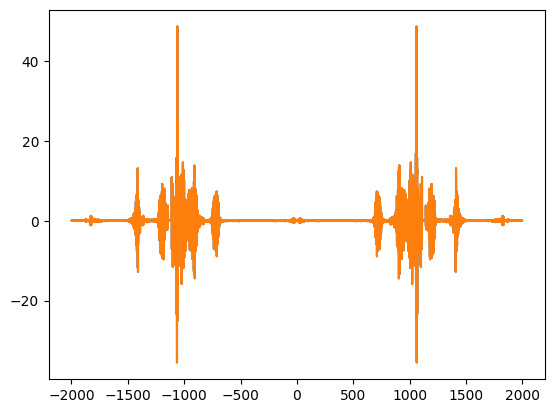

In [124]:
plt.plot(frequency, filtered_signal_dft)
plt.plot(frequency, signal_dft)
